<a href="https://colab.research.google.com/github/Farah-Saleem91/customer-segmentation-using-Kmeans/blob/main/KMeans_Clustering_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#KMeans Clustering (Core)
Task
Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt-to-income ratio to group them into segments.
You can download the data here. The original data is from this data source.
- Use KMeans to create various customer segments.
1. Use an Elbow Plot of inertia.
2. And a plot of Silhouette Scores.
3. Choose a K based on the results.

- Analyze the clusters you made in Part 1.
1. Create analytical visualizations that explore statistics for each feature for each cluster.
2. Write a description of each cluster based on the visualizations you created.
1. Do more than describe the numbers; try to see beyond the numbers and describe the people represented by each cluster.
2. Include at least one insight for each cluster.
3. Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit cards differently or which cards they should market to each cluster based on your data and insights.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [5]:
# Get Data
path='/content/drive/MyDrive/cust_seg.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [8]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
#drop unnamed
df = df.drop(columns=['Unnamed: 0'])


In [7]:
#set id as index
df=df.set_index('Customer Id')
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [ ]:
#impute missing values in deafulted column
df['Defaulted'] = df['Defaulted'].fillna(0)
df['Defaulted'].isna().sum()

np.int64(0)

In [ ]:
# Use KMeans to create various customer segments.
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_scaled = pd. DataFrame (scaler.fit_transform(df), columns=df.columns)
X_scaled.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507


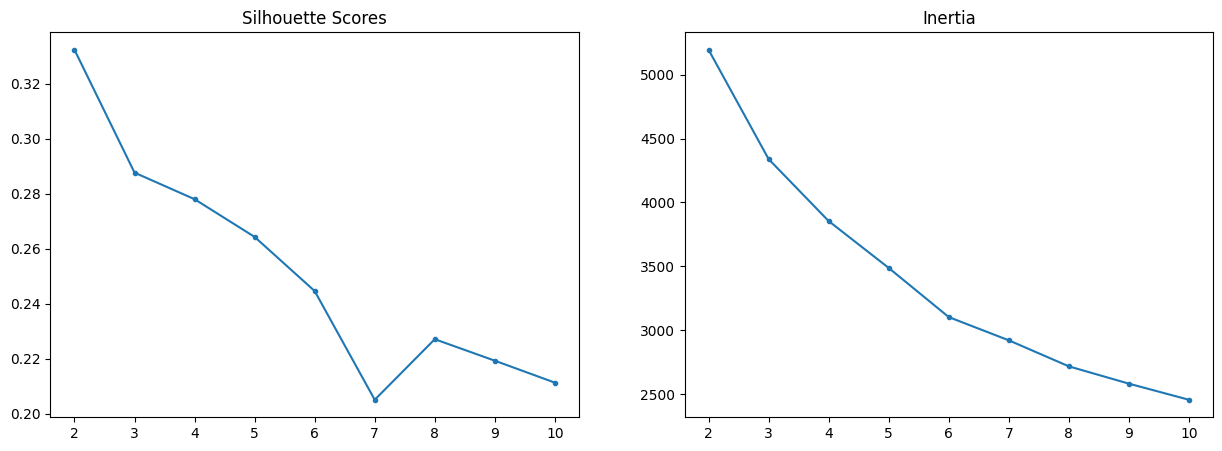

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range (2,11)
sils = []
inertias = []
for k in ks:
 kmeans = KMeans (n_clusters=k, n_init = 'auto', random_state=42)
 kmeans.fit(X_scaled)
 sils.append(silhouette_score(X_scaled, kmeans.labels_))
 inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots (1,2, figsize=(15,5))
axes[0].plot(ks, sils,marker='.')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias, marker='.')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=2, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index

cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,42.108247,1.948454,15.793814,91.742268,3.874990,7.241469,0.242268,14.205155
1,1,32.935976,1.640244,6.428354,33.347561,0.897178,1.847732,0.207317,8.978811


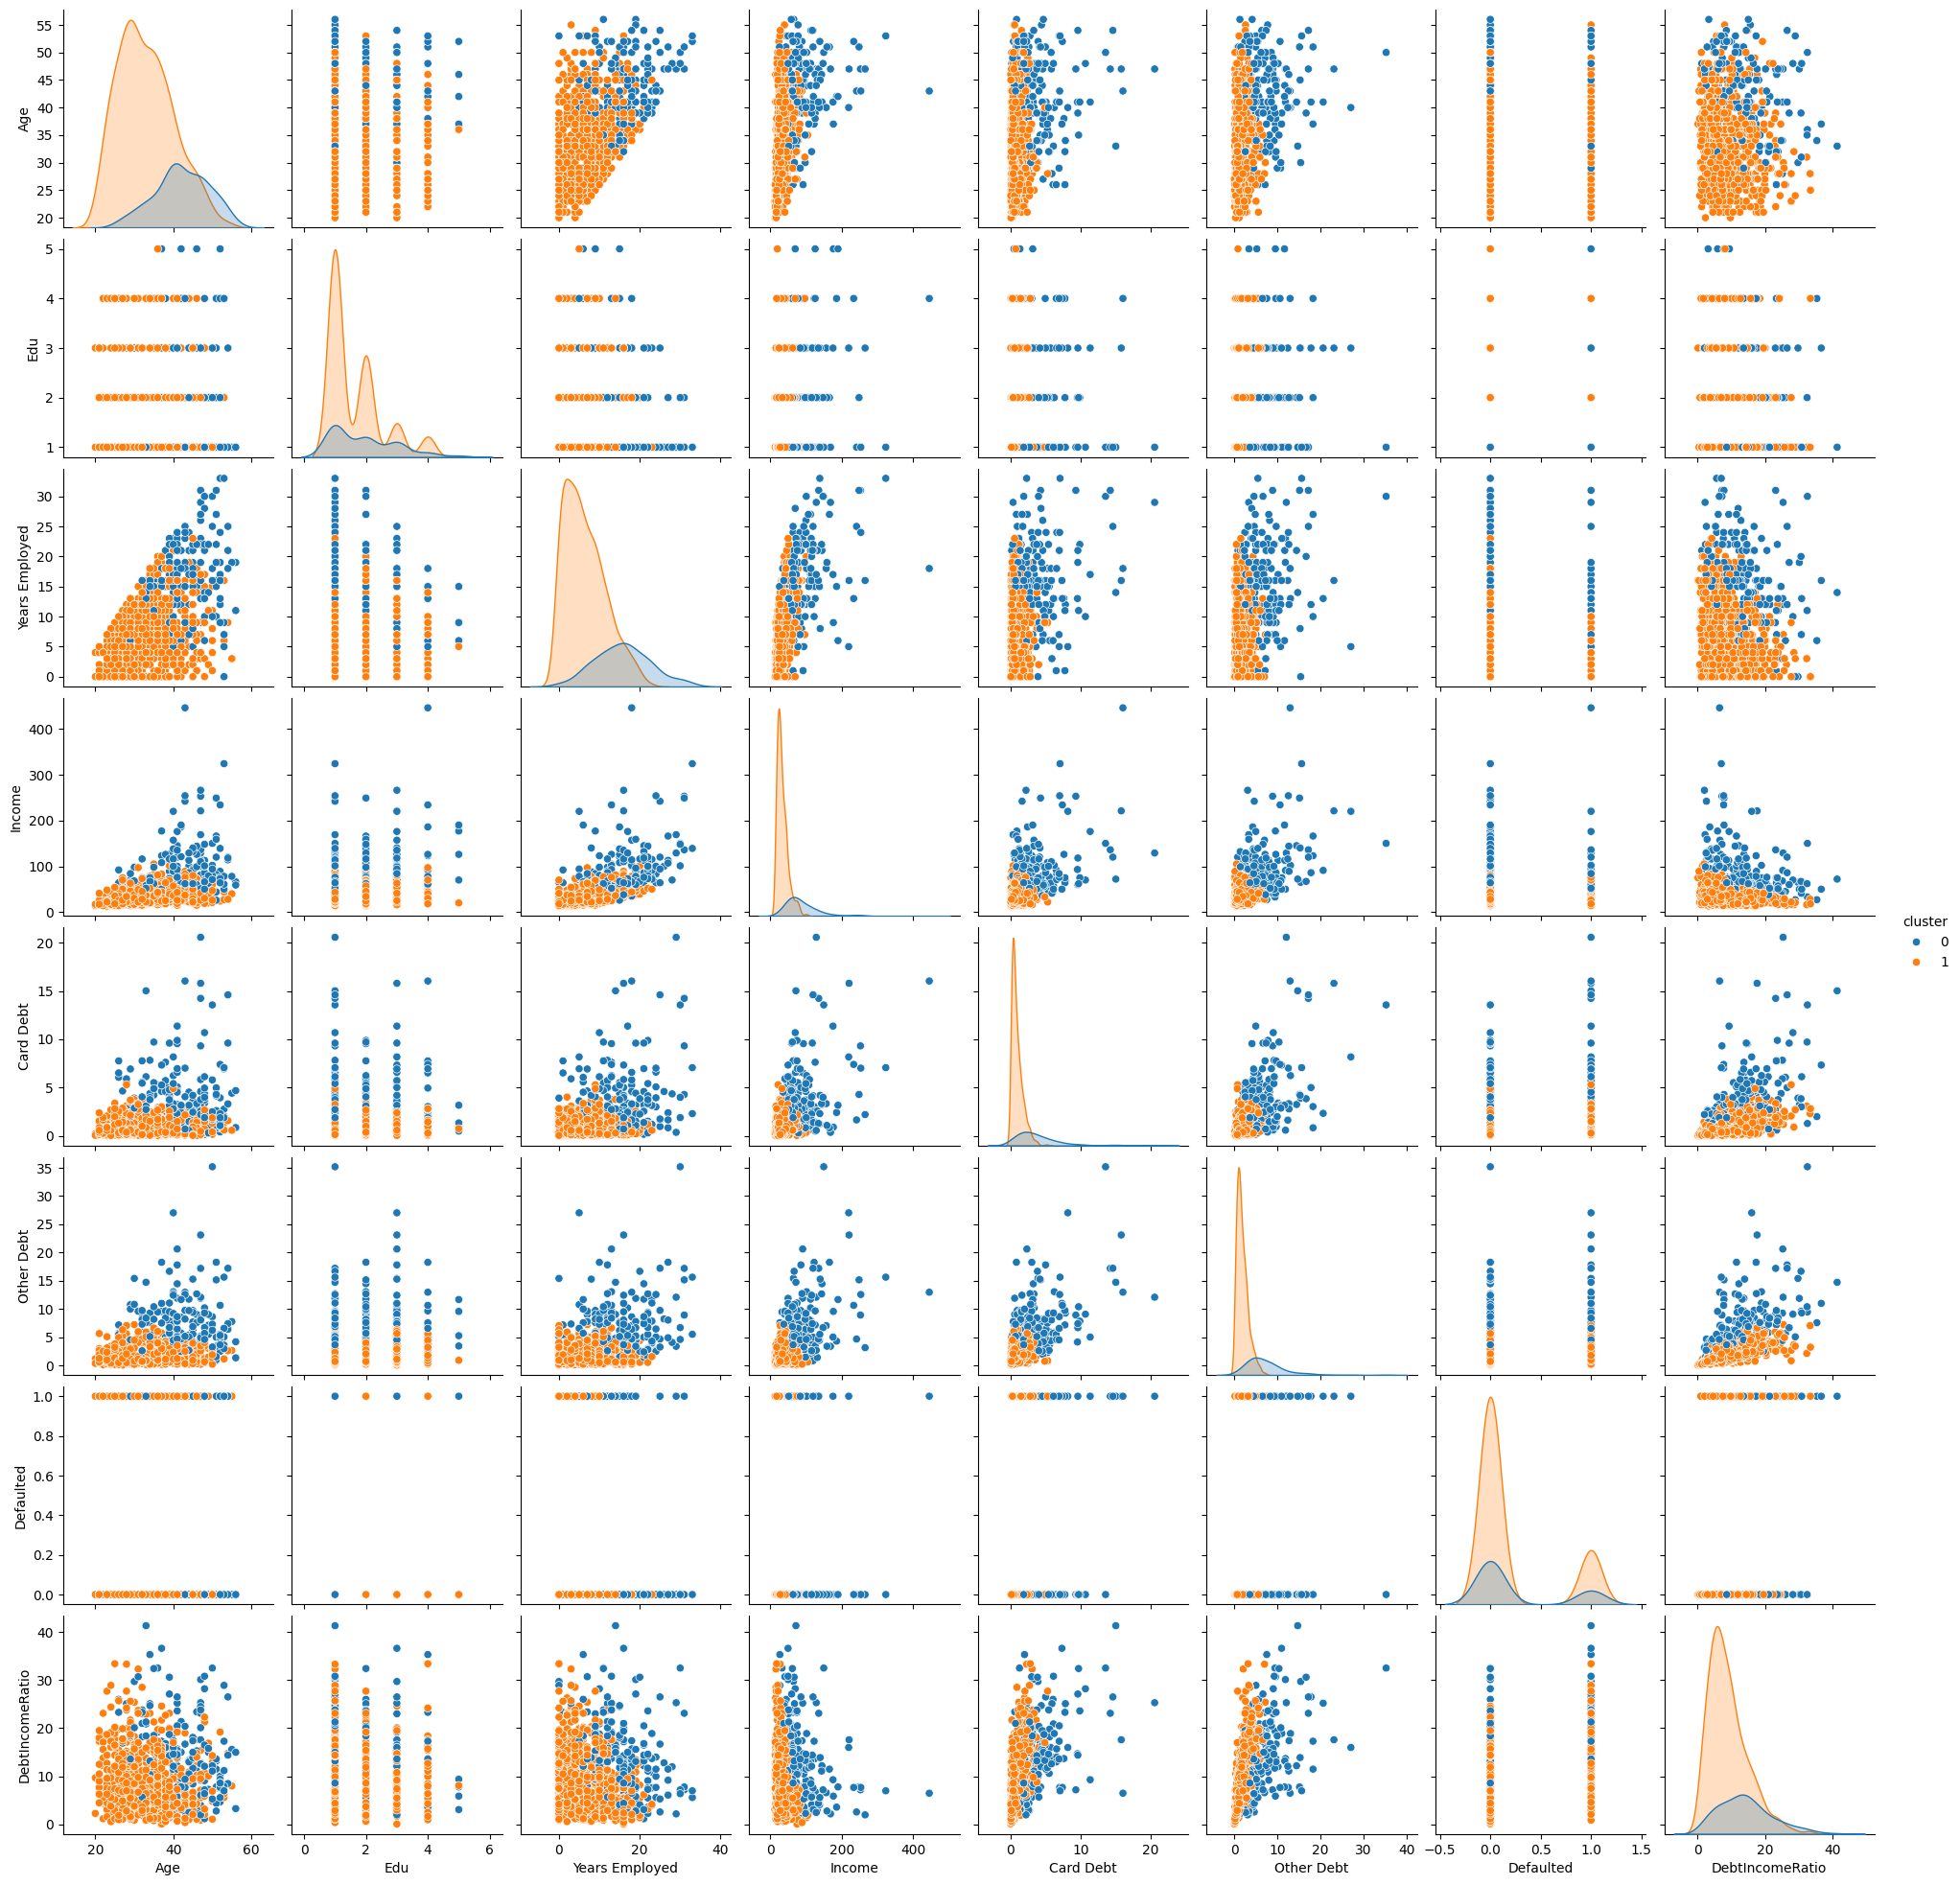

In [ ]:
#visulaize the clusters
sns.pairplot(df, hue='cluster')

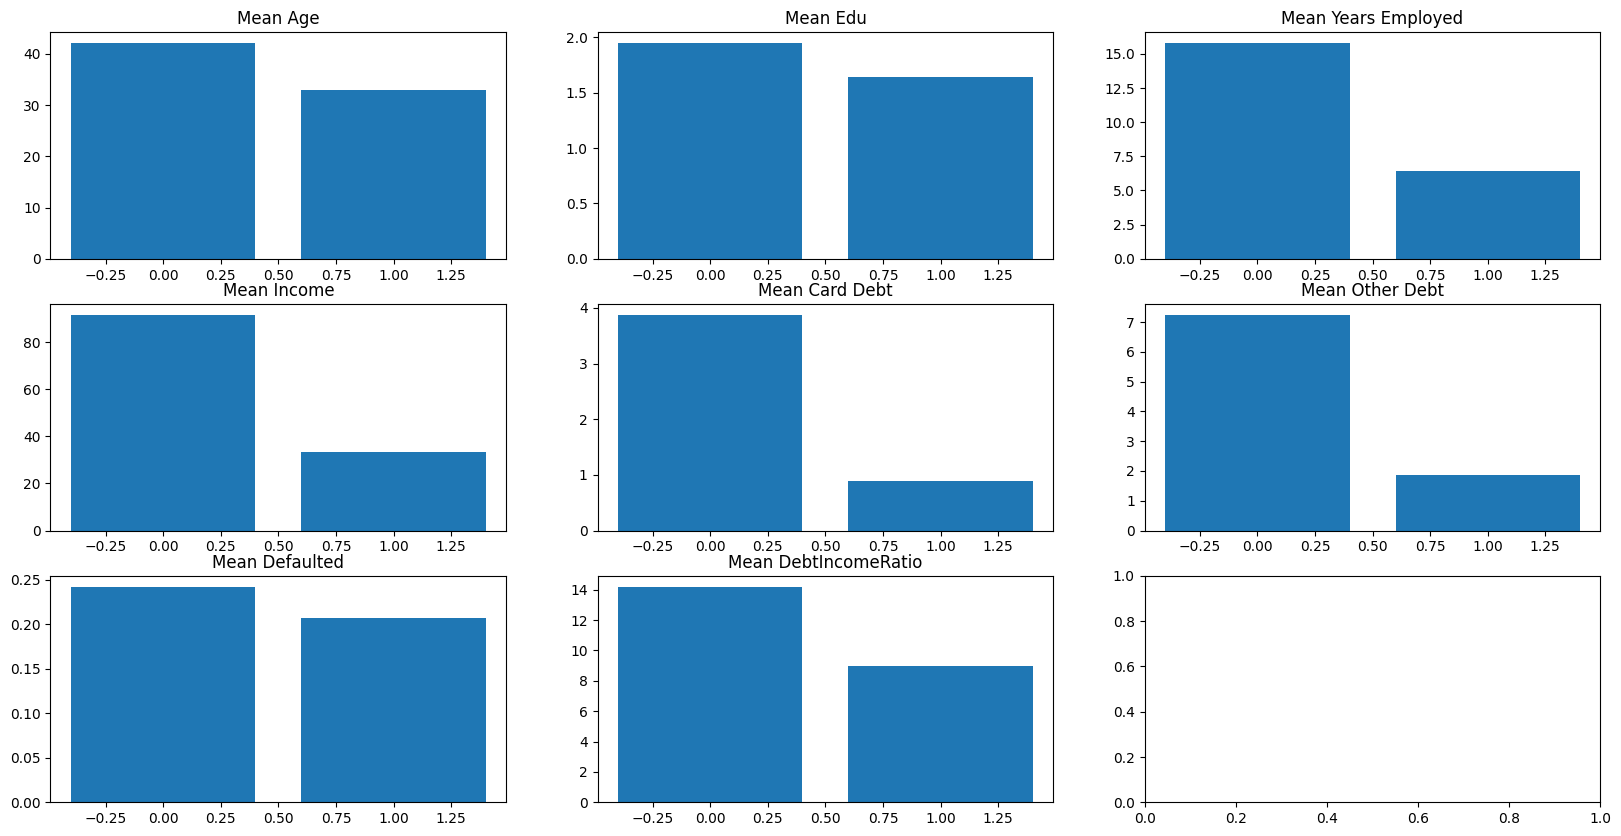

In [ ]:
# Visualize means
fig, axes = plt.subplots (3,3, figsize = (20, 10))
# fig is an array of dimensions 3,4. axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate (cluster_groups.columns[1:]):
 axes[i].bar(cluster_groups ['cluster'], cluster_groups[col])
 axes[i].set_title(f'Mean {col}')